In [ ]:
# 1.5 Advanced  Convolutional Neural Networks 
# 1.5.6 Train and Test    @QuantumYou
# @aqlzh


In [ ]:
import torch
from torch import nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='../data/mnist', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

test_dataset = datasets.MNIST(root='../data/mnist', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)


class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(x + y)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.mp = nn.MaxPool2d(2)

        self.rblock1 = ResidualBlock(16)
        self.rblock2 = ResidualBlock(32)

        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(F.relu(self.conv1(x)))
        x = self.rblock1(x)
        x = self.mp(F.relu(self.conv2(x)))
        x = self.rblock2(x)
        x = x.view(in_size, -1)
        x = self.fc(x)
        return x


model = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    running_loss = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data

        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %3d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0


accuracy = []


def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)

            correct += (predicted == labels).sum().item()
    print('Accuracy on test set: %d %% [%d/%d]' % (100 * correct / total, correct, total))
    accuracy.append(100 * correct / total)


if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()
    print(accuracy)
    plt.plot(range(10), accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3628974.67it/s]


Extracting ../data/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ../data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 144403.93it/s]


Extracting ../data/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ../data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1251008.71it/s]


Extracting ../data/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2280135.10it/s]


Extracting ../data/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/mnist\MNIST\raw

[1, 300] loss: 0.545
[1, 600] loss: 0.165
[1, 900] loss: 0.114
Accuracy on test set: 97 % [9727/10000]
[2, 300] loss: 0.092
[2, 600] loss: 0.078
[2, 900] loss: 0.076
Accuracy on test set: 97 % [9794/10000]
[3, 300] loss: 0.064
[3, 600] loss: 0.064
[3, 900] loss: 0.054
Accuracy on test set: 98 % [9838/10000]
[4, 300] loss: 0.051
[4, 600] loss: 0.049
[4, 900] loss: 0.047
Accuracy on test set: 98 % [9850/10000]
[5, 300] loss: 0.041
[5, 600] loss: 0.042
[5, 900] loss: 0.042
Accuracy on test set: 98 % [9862/10000]
[6, 300] loss: 0.034
[6, 600] loss: 0.039
[6, 900] loss: 0.038
Accuracy on test set: 98 % [9883/10000]
[7, 300] loss: 0.029
[7, 600] loss: 0.030
[7, 900] loss: 0.038
Accuracy on test set: 98 % [9864/10000]
[8, 300] loss: 0.029
[8, 600] loss: 0.026
[8, 900] loss: 0.032
Accuracy on test set: 98 % [9880/10000]
[9, 300] loss: 0.023
[9, 600] loss: 0.027
[9, 900] loss: 0.027
Accuracy on test set: 99

In [7]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch import utils

# setup data
dataset = MNIST('./data', download=True, transform=ToTensor())
train_loader = utils.data.DataLoader(dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 5040696.64it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 129865.93it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1252916.78it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4541246.43it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



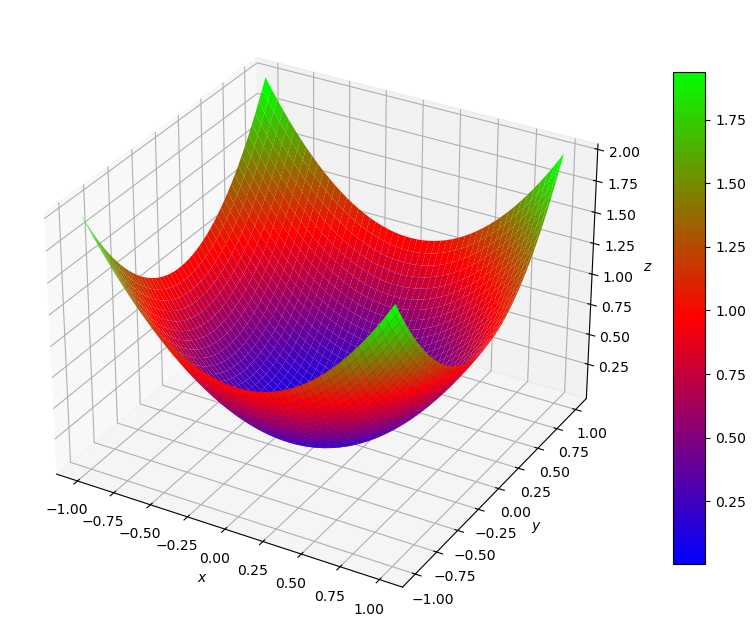

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D #绘制3D图案

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,50)
x_,y_ = np.meshgrid(x,y,indexing='ij') 
z_ = x_**2 + y_**2
fig = plt.figure(figsize=(12,8),facecolor='white') #创建图片
sub = fig.add_subplot(111,projection='3d')# 添加子图，
surf = sub.plot_surface(x_,y_,z_,cmap=plt.cm.brg) #绘制曲面,并设置颜色cmap
cb = fig.colorbar(surf,shrink=0.8,aspect=15) #设置颜色棒

sub.set_xlabel(r"$x$")
sub.set_ylabel(r"$y$")
sub.set_zlabel(r"$z$")
plt.show()

In [1]:
import sys
import torch
import torchvision
import tensorflow as tf

print(sys.version)
print(sys.executable)


3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]
C:\ProgramData\Anaconda3\python.exe


In [2]:
print(torch.__version__) 
print(torch.cuda.is_available())


2.3.0+cu118
True


In [4]:
torchvision.__version__


'0.18.0+cu118'

In [5]:
tf.__version__ 

'2.10.0'